In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/train.csv")

In [3]:
print("Dataset shape:", df.shape)

Dataset shape: (1460, 81)


In [4]:
print("Info", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
missing = df.isnull().sum()
print("Missing Values:" , missing)

Missing Values: Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [15]:
missing_df = pd.DataFrame({
    "Missing Values": missing,
    "% of Total": (missing / len(df)) * 100
})
display(missing_df)

,Missing Values,% of Total
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,17.739726
LotArea,0,0.000000
...,...,...
MoSold,0,0.000000
YrSold,0,0.000000
SaleType,0,0.000000
SaleCondition,0,0.000000


C:\Users\dhara\AppData\Local\Temp\ipykernel_15792\3329366955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.values, y=missing.index, palette="mako")


Text(0.5, 1.0, 'Missing Values Per Feature')

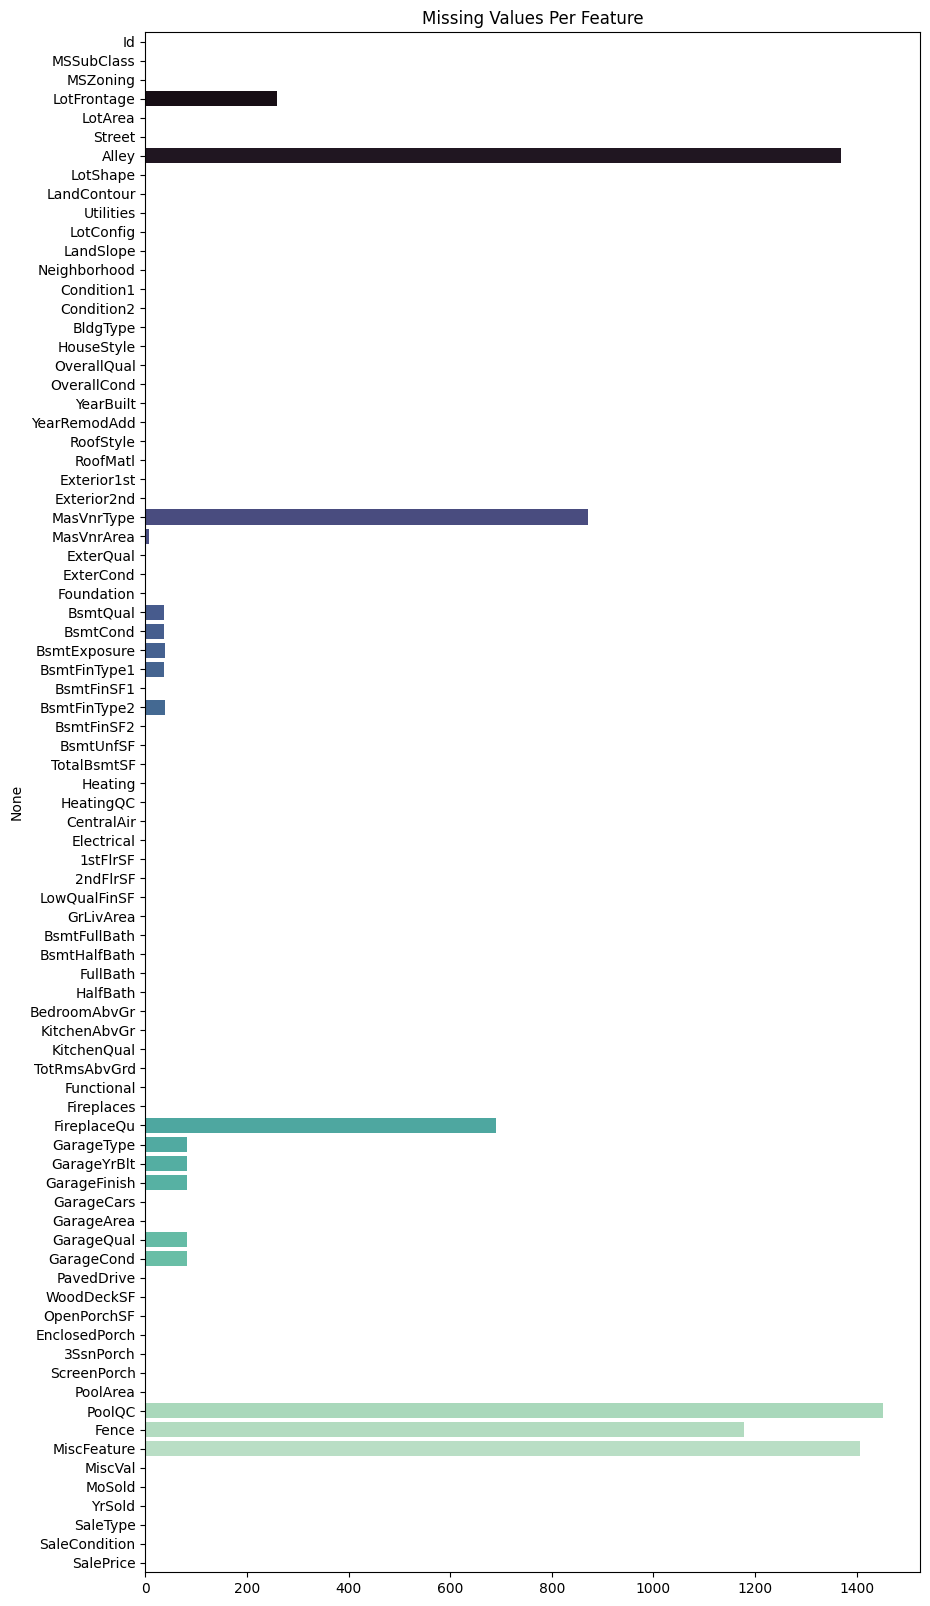

In [18]:
plt.figure(figsize=(10, 20))
sns.barplot(x=missing.values, y=missing.index, palette="mako")
plt.title("Missing Values Per Feature")

Skewness: 1.88


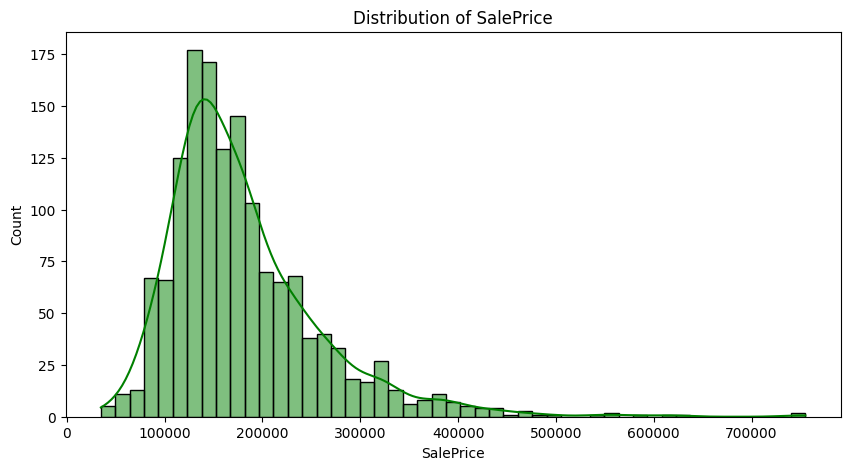

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(df["SalePrice"], kde=True, color="green")
plt.title("Distribution of SalePrice")
print(f"Skewness: {df['SalePrice'].skew():.2f}")

In [20]:
numerical = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical = df.select_dtypes(include="object").columns.tolist()

numerical.remove("SalePrice")
print(f"Numerical Features: {numerical[:5]}")
print(f"Categorical Features: {categorical[:5]}")

Numerical Features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual']
Categorical Features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']


Text(0.5, 1.0, 'Top Correlated Features with SalePrice')

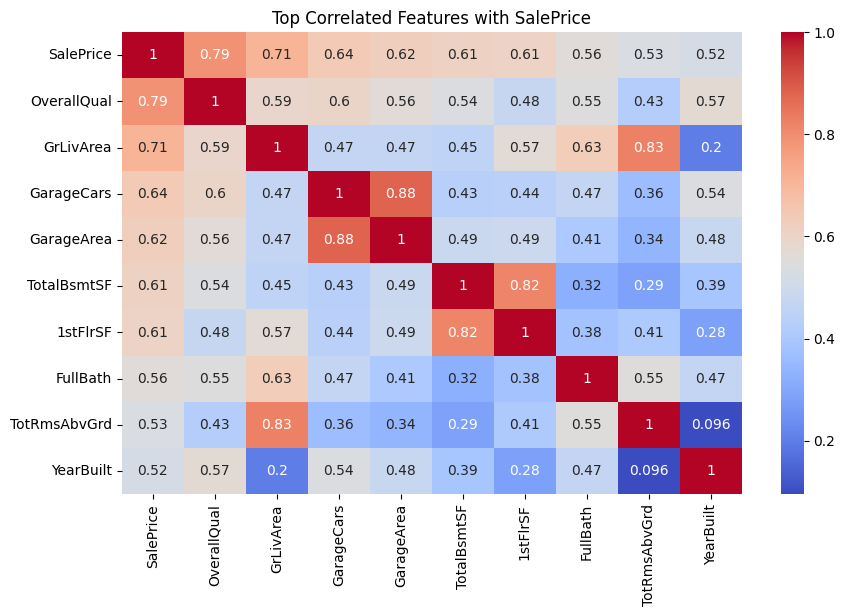

In [21]:
corr = df[numerical + ["SalePrice"]].corr()
top_corr = corr["SalePrice"].abs().sort_values(ascending=False).head(10).index

plt.figure(figsize=(10, 6))
sns.heatmap(df[top_corr].corr(), annot=True, cmap="coolwarm")
plt.title("Top Correlated Features with SalePrice")

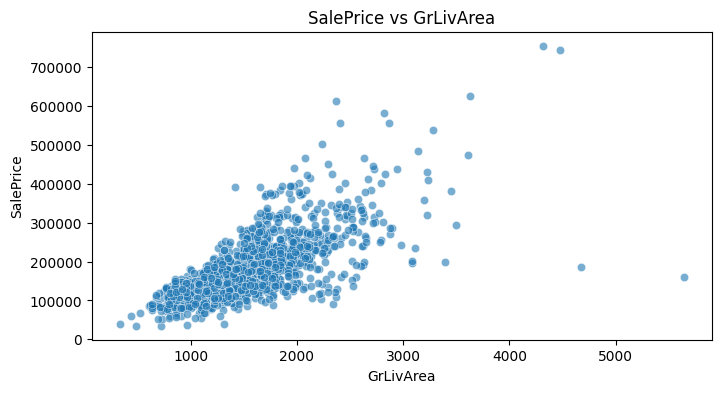

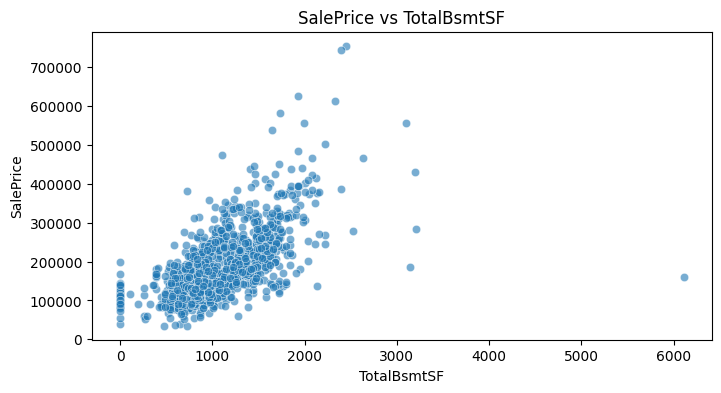

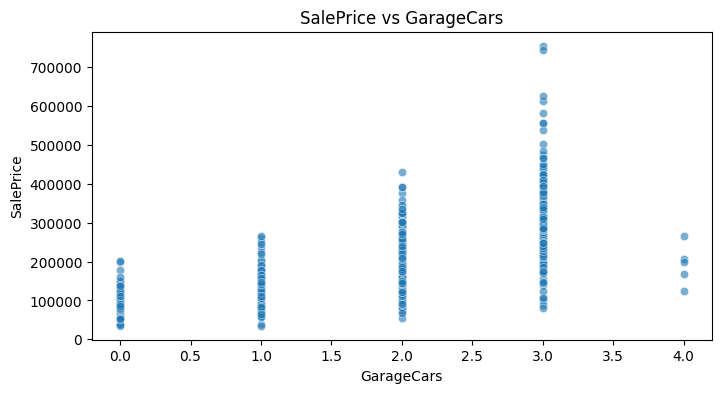

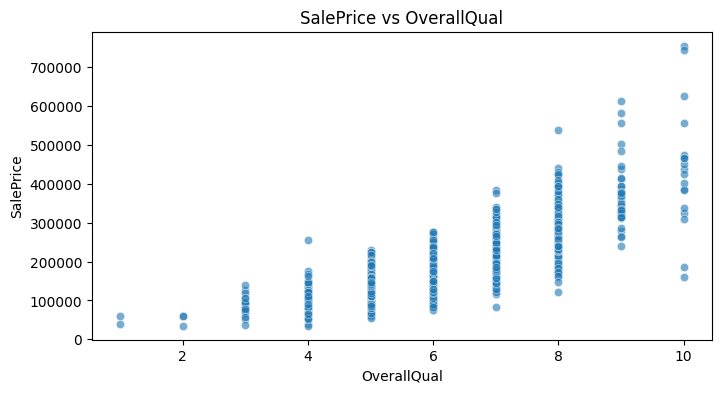

In [22]:
key_features = ["GrLivArea", "TotalBsmtSF", "GarageCars", "OverallQual"]

for feature in key_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df[feature], y=df["SalePrice"], alpha=0.6)
    plt.title(f"SalePrice vs {feature}")